In [1]:
print('My name is Zhicheng (Jason) Xue')

My name is Zhicheng (Jason) Xue


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(2018)

### 1.  Placeholder for an input array with dtype float32 and shape None
### 2.  Scopes for the input, middle section and final node f

In [3]:
graph = tf.Graph()

In [4]:
with graph.as_default():
    
    #Scope for the input section 
    with tf.name_scope(name='Input_placeholder'):
        #1.  Placeholder for an input array with dtype float32 and shape None
        a = tf.placeholder(shape=None, dtype=tf.float32, name='input_a')
        
    #Scope for the middle section 
    with tf.name_scope(name='Middle_section'):
        
        b = tf.reduce_prod(input_tensor=a, name='product_b')
        c = tf.reduce_mean(input_tensor=a, name='mean_c')
        d = tf.reduce_sum(input_tensor=a, name='sum_d')
        e = tf.add(b,c, name='add_e')
        
    #Scope for the final node   
    with tf.name_scope(name='Final_node'):
        
        f = tf.multiply(x=e,y=d,name='mul_f')

### 3.  Feed the placeholder with an array A consisting of 100 normally distributed random numbers with Mean = 1 and Standard devia=on = 2

In [5]:
input_array=np.random.normal(1,2,100)

In [6]:
print(input_array)

[ 2.64081826e+00  2.09959774e+00  1.78568866e+00  1.81446886e-01
  1.25909470e+00  2.20953826e+00  2.84538954e+00  2.92445779e-01
 -1.50297314e+00  2.52719099e-01 -1.87094977e+00  1.50930579e+00
  1.67477569e+00  1.22236573e+00 -6.35357426e-01  6.01078809e-01
  1.04401462e+00  5.71105166e+00 -1.13340353e+00  2.30732658e+00
  1.67206217e+00 -1.19361089e+00 -3.33492888e+00  1.07023214e+00
  1.02199008e+00  4.24736462e-01  3.23041263e-01  2.69442785e+00
  1.06395863e+00  5.38191388e-01  1.65455862e+00  8.76624910e-01
 -1.91954395e+00 -8.17410371e-01  2.83540997e+00  2.57889639e+00
  4.91787119e-01  1.99209500e+00 -2.73035781e+00  2.20100457e-02
  9.42828522e-01 -2.68007054e-01 -2.72554956e-01  3.79550257e+00
 -3.71689966e-01 -1.08120148e+00 -4.76418573e-01  1.32657946e+00
  3.12127799e+00 -1.93537743e+00  6.91145003e-01  9.34454082e-01
  2.42768051e+00  6.38498516e-01  2.24945368e+00 -7.21070224e-01
 -1.07748561e+00  6.67292521e+00  4.88211595e+00 -4.73575787e-01
  6.38561136e-03 -9.83788

In [7]:
replace_dict={a:input_array}

In [8]:
sess=tf.Session(graph=graph)

In [9]:
sess.run(a,feed_dict=replace_dict)

array([ 2.6408184e+00,  2.0995977e+00,  1.7856886e+00,  1.8144688e-01,
        1.2590947e+00,  2.2095382e+00,  2.8453896e+00,  2.9244578e-01,
       -1.5029731e+00,  2.5271910e-01, -1.8709497e+00,  1.5093058e+00,
        1.6747757e+00,  1.2223657e+00, -6.3535744e-01,  6.0107881e-01,
        1.0440146e+00,  5.7110515e+00, -1.1334035e+00,  2.3073266e+00,
        1.6720622e+00, -1.1936109e+00, -3.3349290e+00,  1.0702322e+00,
        1.0219901e+00,  4.2473647e-01,  3.2304126e-01,  2.6944280e+00,
        1.0639586e+00,  5.3819138e-01,  1.6545587e+00,  8.7662488e-01,
       -1.9195440e+00, -8.1741035e-01,  2.8354099e+00,  2.5788963e+00,
        4.9178711e-01,  1.9920950e+00, -2.7303579e+00,  2.2010045e-02,
        9.4282854e-01, -2.6800704e-01, -2.7255496e-01,  3.7955027e+00,
       -3.7168998e-01, -1.0812014e+00, -4.7641858e-01,  1.3265795e+00,
        3.1212780e+00, -1.9353775e+00,  6.9114500e-01,  9.3445408e-01,
        2.4276805e+00,  6.3849854e-01,  2.2494538e+00, -7.2107023e-01,
      

In [10]:
sess.run(b,feed_dict=replace_dict)

1.7552426

In [11]:
sess.run(c,feed_dict=replace_dict)

0.90185827

In [12]:
sess.run(d,feed_dict=replace_dict)

90.18583

In [13]:
sess.run(e,feed_dict=replace_dict)

2.657101

In [14]:
sess.run(f,feed_dict=replace_dict)

239.63284

### 4.  Save your graph and show it in TensorBoard

In [16]:
writer=tf.summary.FileWriter('./hw2',graph=graph)

![TensorBoard](HW2_TensorBoard.png)

In [17]:
writer.close()

In [18]:
sess.close()

### 5.  Plot you input array on a separate figure

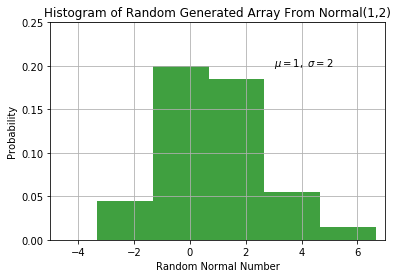

In [19]:
# histogram of the input array
n, bins, patches = plt.hist(input_array, 5, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Random Normal Number')
plt.ylabel('Probability')
plt.title('Histogram of Random Generated Array From Normal(1,2)',)
plt.text(3, .2, r'$\mu=1,\ \sigma=2$')
plt.axis([-5, 7, 0, 0.25])
plt.grid(True)
plt.show()

In [22]:
with tf.Session(graph=tf.Graph()) as sess1:
    with tf.name_scope(name='Input_placeholder'):
    #1.  Placeholder for an input array with dtype float32 and shape None
        a = tf.placeholder(shape=None, dtype=tf.float32, name='input_a')
        sess1.run(a,feed_dict={a:input_array})
sess1.graph.as_graph_def()
writer1=tf.summary.FileWriter('./hw2',graph=sess1.graph)
writer1.close()
sess1.close()

![TensorBoard1](input_placeholder.png)